In [3]:
from datetime import datetime
from sklearn.manifold import TSNE
import pickle

import argparse
import copy
import numpy as np
import time
import os
from PIL import Image
import matplotlib.pyplot as plt
import plotly
import pandas as pd
#from utils import new_transforms

#from utils.dataloader_all import *
#from utils.auc_test import *
#from utils import new_transforms

In [4]:
! pip install torch

In [5]:
t = pickle.load(open( "file_names_3.p", "rb" ))


In [6]:
import pickle
l = pickle.load( open( "labels_all_3.p", "rb" ))
f = pickle.load( open( "finalWs_all_3.p", "rb" ))
p = pickle.load( open( "predictions_all_3.p", "rb" ))
#actual predictions

p = np.argmax(p, axis=1)

In [7]:
len(f)

877

In [8]:
def plot_with_labels(lowDWeights, labels, filename='tsne.png'):
    assert lowDWeights.shape[0] >= len(labels), "More labels than weights"
    plt.figure(figsize=(20, 20))  #in inches
    for i, label in enumerate(labels):
        x, y = lowDWeights[i,:]
        plt.scatter(x, y)
        plt.annotate(label,
                xy=(x, y),
                xytext=(5, 2),
                textcoords='offset points',
                ha='right',
                va='bottom')
    plt.show()
    #plt.savefig(filename)
    
#'TCGA-LUAD': 7, '
#'TCGA-KIRC': 5, 
#'Solid_Tissue_Normal_Lung': 2, 
#'TCGA-LUSC': 8, 
#'TCGA-KIRP': 6, 
#'TCGA-BRCA': 3, 
#'Solid_Tissue_Normal_Kidney': 1, 
#'Solid_Tissue_Normal_Breast': 0, 
#'TCGA-KICH': 4

In [9]:
type(f)
f_filter = []
l_filter = []
t_filter = []
p_filter = []
f[0]


array([0.02053796, 0.00380778, 0.00703983, ..., 0.09226191, 0.08927917,
       0.09227707])

In [10]:
np.isnan(f).sum()
for x in range(1,len(f)):
    array = f[x]
    array2 = l[x]
    array3 = t[x]
    array4 = p[x]
    if ~np.isnan(array[0]):
        f_filter.append(array)
        l_filter.append(array2)
        t_filter.append(array3)
        p_filter.append(array4)
tt_filter = np.array(t_filter)


In [11]:
#combine the name of the file along with the label and the predictions 
data = zip(t_filter,p_filter,l_filter)
test_results = pd.DataFrame(list(data), columns=['file_name','predicted_class','actual_label'])
test_results = test_results.replace(0,'Normal_Breast').replace(1,'Normal_Kidney').replace(2,'Normal_Lung').replace(3,'TCGA-BRCA').replace(4,'TCGA-KICH').replace(5,'TCGA-KIRC').replace(6,'TCGA-KIRP').replace(7,'TCGA-LUAD').replace(8,'TCGA-LUSC')
test_results.to_csv('test_tsne_results.csv')
test_results           

,file_name,predicted_class,actual_label
0,test_TCGA-BP-4340-01A-01-TS1.aca359ae-b140-4f3...,TCGA-KIRC,TCGA-KIRC
1,test_TCGA-CZ-5464-01A-01-TS1.ebeb25cc-4229-416...,TCGA-KIRC,TCGA-KIRC
2,test_TCGA-BP-5185-01A-01-TS1.1a83fb56-c724-42f...,TCGA-KIRC,TCGA-KIRC
3,test_TCGA-CJ-5677-01A-01-TS1.62b96377-119b-418...,TCGA-KIRC,TCGA-KIRC
4,test_TCGA-CJ-4643-01A-01-TS1.cd5dede4-80cc-48a...,TCGA-KIRC,TCGA-KIRC
5,test_TCGA-BP-4774-01A-01-TS1.8505fa70-5941-4ee...,TCGA-KIRC,TCGA-KIRC
6,test_TCGA-CZ-5465-01A-01-TS1.a792fb44-6324-493...,TCGA-KIRC,TCGA-KIRC
7,test_TCGA-BP-5187-01A-01-TS1.849c8b4b-403b-4b7...,TCGA-KIRC,TCGA-KIRC
8,test_TCGA-A3-3328-01A-01-BS1.cba39f7f-a590-4a0...,TCGA-KIRC,TCGA-KIRC
9,test_TCGA-B2-5633-01B-03-BS3.06E95813-55FF-4A6...,TCGA-KIRC,TCGA-KIRC


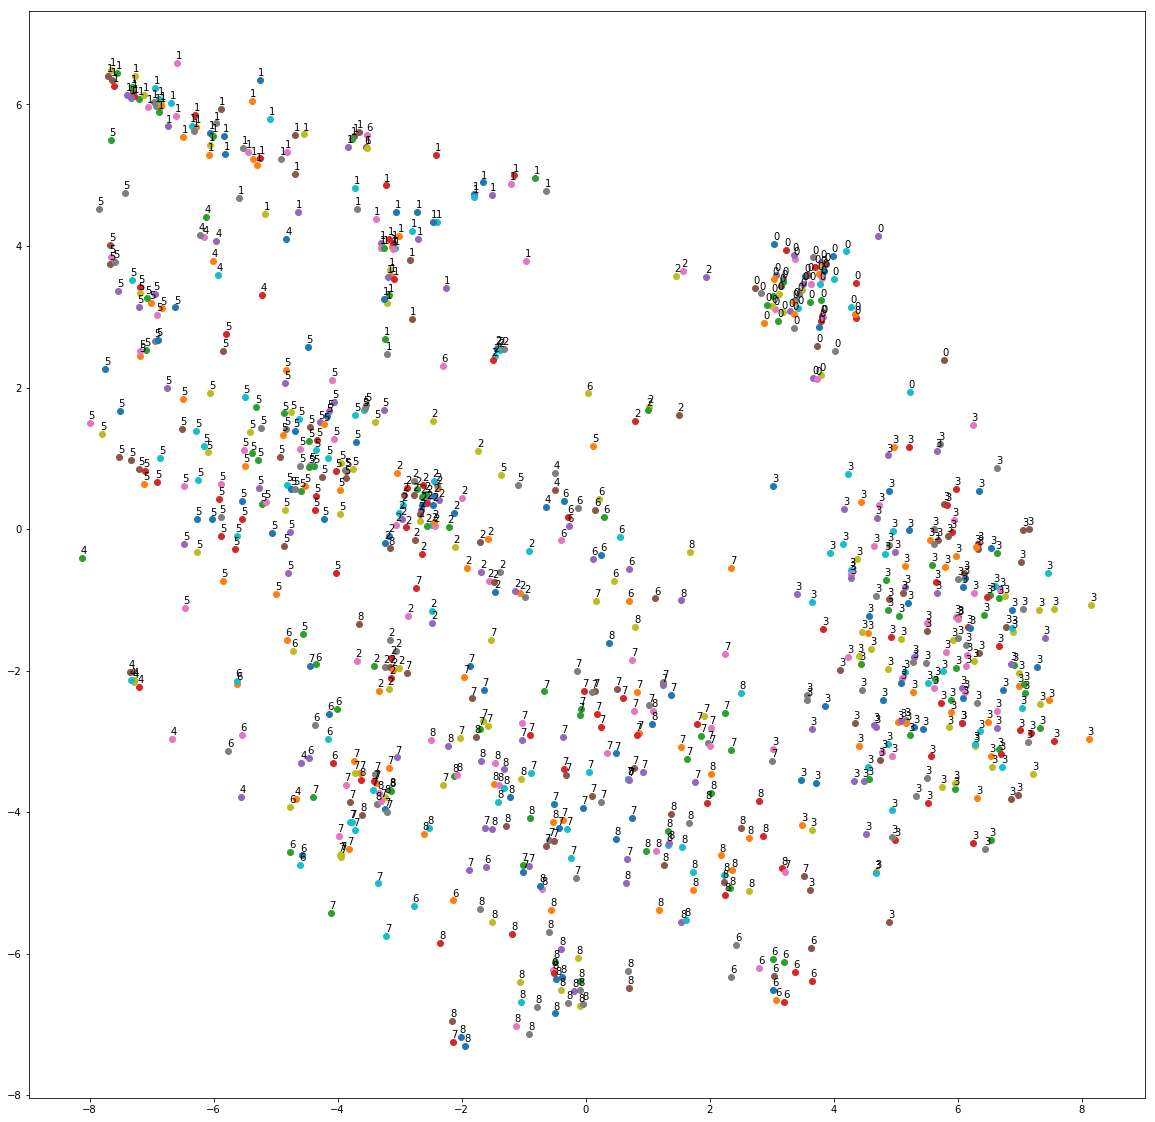

In [12]:
%matplotlib inline  
#import numpy as np
#from sklearn.manifold import TSNE

tsne = TSNE(perplexity=200, n_components=2, init='pca', n_iter=2000)
plot_only = 500
lowDWeights = tsne.fit_transform(f_filter)
labels = l_filter#['0','1','2','3','4','5','6','7','8','0','1','2','3','4','5','6','7','8','0','1','2','3','4','5','6','7','8','0','1','2','3','4','5','6','7','8']
plot_with_labels(lowDWeights, labels)

plt.show()

In [13]:
len(f_filter)
lowDWeights

array([[-7.746305  ,  2.267758  ],
       [-6.8353114 ,  3.1177437 ],
       [-7.65598   ,  5.5010815 ],
       ...,
       [ 6.6329226 ,  0.87010914],
       [ 8.14935   , -1.07537   ],
       [ 3.644825  , -1.0308771 ]], dtype=float32)

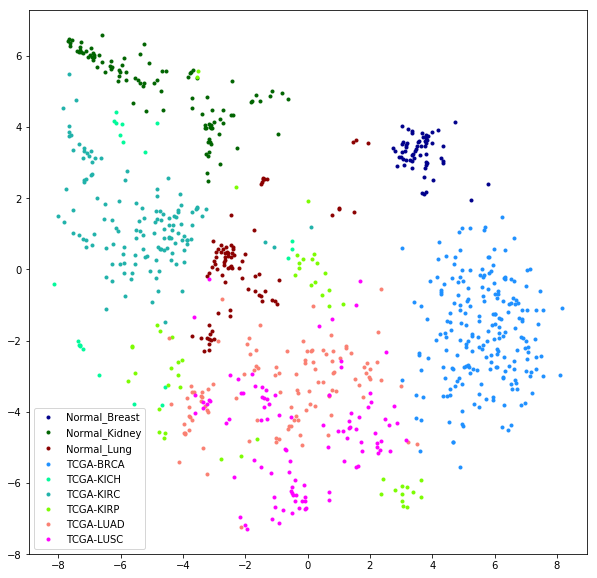

In [14]:
ip1_tsne_display = lowDWeights #[display_indices]
labels_display = l_filter #[display_indices]

classNames = ['Normal_Breast', 
              'Normal_Kidney',
              'Normal_Lung',
              'TCGA-BRCA',
              'TCGA-KICH',
              'TCGA-KIRC',
              'TCGA-KIRP', 
              'TCGA-LUAD', 
              'TCGA-LUSC']

print_classes = 9
#cmap = plt.get_cmap('nipy_spectral')
#colors = cmap(np.linspace(0, 1.0, print_classes))
#colors = (colors + np.ones(colors.shape))/2.0
colors =  'darkblue', 'darkgreen','darkred','dodgerblue', 'mediumspringgreen','lightseagreen','lawngreen', 'salmon','fuchsia'
test_colors = colors;

f = plt.figure(figsize=(10,10))

for label, color, className in zip(range(0,9), test_colors, classNames):
    #print(label)
    plt.plot(ip1_tsne_display[np.array(labels_display) == label, 0], ip1_tsne_display[np.array(labels_display) == label, 1],
            'o', markersize=3, label=className, color=color)

plt.legend()
#plt.savefig('tsne.png')

plt.show()
#f.savefig("tsne_fc7.pdf", bbox_inches='tight')


In [15]:
len(ip1_tsne_display)

870

# interactive plots

In [16]:
# Importing Modules
from sklearn import datasets
from sklearn.cluster import KMeans

# Declaring Model
model = KMeans(n_clusters=9)
# Fitting Model
model.fit(ip1_tsne_display)

# Predicitng a single input
#predicted_label = model.predict([[7.2, 3.5, 0.8, 1.6]])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=9, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [18]:
import plotly.plotly as py
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
plotly.tools.set_credentials_file(username='sedabilaloglu', api_key='4qfIDNxumSjAsMTGxTgD')
from plotly.graph_objs import Bar, Scatter, Figure, Layout
import numpy as np

trace0 = go.Scatter(
    x = ip1_tsne_display[np.array(labels_display) == 0, 0], 
    y = ip1_tsne_display[np.array(labels_display) == 0, 1],
    name = 'Normal_Breast',
    mode = 'markers',
    text=tt_filter[np.array(np.array(labels_display) == 0, dtype=bool)],
    marker = dict(
        size = 10,
        color = 'darkblue',
        line = dict(
            width = 2,
            color = 'rgb(0, 0, 0)'
        )
    )
)

trace1 = go.Scatter(
    x = ip1_tsne_display[np.array(labels_display) == 1, 0], 
    y = ip1_tsne_display[np.array(labels_display) == 1, 1],
    name = 'Normal_Kidney',
    mode = 'markers',
    text=tt_filter[np.array(np.array(labels_display) == 1, dtype=bool)],
    marker = dict(
        size = 10,
        color = 'darkgreen',
        line = dict(
            width = 2,
        )
    )
)


trace2 = go.Scatter(
    x = ip1_tsne_display[np.array(labels_display) == 2, 0], 
    y = ip1_tsne_display[np.array(labels_display) == 2, 1],
    name = 'Normal_Lung',
    mode = 'markers',
    text=tt_filter[np.array(np.array(labels_display) == 2, dtype=bool)],
    marker = dict(
        size = 10,
        color = 'darkred',
        line = dict(
            width = 2,
        )
    )
)

trace3 = go.Scatter(
    x = ip1_tsne_display[np.array(labels_display) == 3, 0], 
    y = ip1_tsne_display[np.array(labels_display) == 3, 1],
    name = 'TCGA-BRCA',
    mode = 'markers',
    text=tt_filter[np.array(np.array(labels_display) == 3, dtype=bool)],
    marker = dict(
        size = 10,
        color = 'dodgerblue',
        line = dict(
            width = 2,
        )
    )
)


trace4 = go.Scatter(
    x = ip1_tsne_display[np.array(labels_display) == 4, 0], 
    y = ip1_tsne_display[np.array(labels_display) == 4, 1],
    name = 'TCGA-KICH',
    mode = 'markers',
    text=tt_filter[np.array(np.array(labels_display) == 4, dtype=bool)],
    marker = dict(
        size = 10,
        color = 'mediumspringgreen',
        line = dict(
            width = 2,
        )
    )
)


trace5 = go.Scatter(
    x = ip1_tsne_display[np.array(labels_display) == 5, 0], 
    y = ip1_tsne_display[np.array(labels_display) == 5, 1],
    name = 'TCGA-KIRC',
    mode = 'markers',
    text=tt_filter[np.array(np.array(labels_display) == 5, dtype=bool)],
    marker = dict(
        size = 10,
        color = 'lightseagreen',
        line = dict(
            width = 2,
        )
    )
)


trace6 = go.Scatter(
    x = ip1_tsne_display[np.array(labels_display) == 6, 0], 
    y = ip1_tsne_display[np.array(labels_display) == 6, 1],
    name = 'TCGA-KIRP',
    mode = 'markers',
    text=tt_filter[np.array(np.array(labels_display) == 6, dtype=bool)],
    marker = dict(
        size = 10,
        color = 'lawngreen',
        line = dict(
            width = 2,
        )
    )
)


trace7 = go.Scatter(
    x = ip1_tsne_display[np.array(labels_display) == 7, 0], 
    y = ip1_tsne_display[np.array(labels_display) == 7, 1],
    name = 'TCGA-LUAD',
    mode = 'markers',
    text=tt_filter[np.array(np.array(labels_display) == 7, dtype=bool)],
    marker = dict(
        size = 10,
        color = 'salmon',
        line = dict(
            width = 2,
        )
    )
)


trace8 = go.Scatter(
    x = ip1_tsne_display[np.array(labels_display) == 8, 0], 
    y = ip1_tsne_display[np.array(labels_display) == 8, 1],
    name = 'TCGA-LUSC',
    mode = 'markers',
    text=tt_filter[np.array(np.array(labels_display) == 8, dtype=bool)],
    marker = dict(
        size = 10,
        color = 'fuchsia',
        line = dict(
            width = 2,
        )
    )
)

data = [trace0, trace1,trace2, trace3,trace4, trace5,trace6, trace7,trace8]

layout = dict(title = 'tsne',
              yaxis = dict(zeroline = False),
              xaxis = dict(zeroline = False)
             )

fig = dict(data=data, layout=layout)
plotly.offline.plot(fig, filename='tsne.html')

'tsne.html'

In [ ]:
from sklearn.cluster import SpectralClustering
sc = SpectralClustering(3, affinity='precomputed', n_init=100,
                        assign_labels='discretize')
sc.fit_predict(adjacency_matrix)  